Group 17: Avani Kala (NUID: 002772623), Yashvi Bhandari (NUID:002122037)

In [7]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Reading the dataset using pandas

data = pd.read_csv("movies.csv")
data.head()

C:\Users\avani\AppData\Local\Temp\ipykernel_6252\1751342605.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("movies.csv")


,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,(2015 TV Special),4.0,TV-MA,94 min,"Adult, News",124.0,0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,(2008 Video),3.8,Not Certified,88 min,Adult,174.0,0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,(2011 TV Special),5.7,Not Certified,83 min,"Adult, News",39.0,0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot
3,tt6843596,Best in Sex: 2017 AVN Awards,(2017 TV Special),4.9,TV-MA,87 min,"Adult, News",225.0,0,nm1624094,Gary Miller,"nm5221471,nm2670531,nm4920605,nm3038816","Amirah Adara,Asa Akira,Anikka Albrite,Britney ...","Considered the industry's highest honor, the A..."
4,tt3705604,AVN Awards 2014,(2014 TV Special),6.7,R,82 min,"Adult, News",101.0,0,nm1624094,Gary Miller,"nm2670531,nm4920605,nm6284246,nm3992720","Asa Akira,Anikka Albrite,August Ames,Jessie An...",Erotic filmmaking superstars Chanel Preston an...


## Basics of Dataset

In [9]:
# Size of the Dataset

print(f'The number of records in the original dataset: {data.shape[0]}')
print(f'The number of features in the original dataset: {data.shape[1]}')

The number of records in the original dataset: 2590932
The number of features in the original dataset: 14


In [10]:
# Checking number of unique ids in the dataset

count_unique_ids = len(np.unique(np.array(data['id'].to_list())))
print(f'Number of unique ids: {count_unique_ids}')

Number of unique ids: 2590932


In [11]:
# Removing all the shows with duration = 0 mins
# Working on a subset of data to decrease computation complexity.

data = data[data['duration'] != '0 min']
data = data.head(5000)


In [12]:
print(f'The number of records in the filtered dataset: {data.shape[0]}')
print(f'The number of features in the filtered dataset: {data.shape[1]}')

The number of records in the filtered dataset: 5000
The number of features in the filtered dataset: 14


## Dataset Preprocessing 

In [13]:
# Fetching year of release for all entries
data['year'] = data['year'].str.extract('(\d+)')

In [14]:
# After extracting year of release we observe that 
# The dataset containes NaN values and Hence
# We impute these NaN values with '0'

nan_values_before = data[data['year'].isnull()].shape
print(f'Number of record with NaN values before imputing 0: {nan_values_before[0]}')

data['year'] = data['year'].fillna(0)
nan_values_after = data[data['year'].isnull()].shape
print(f'Number of record with NaN values after imputing 0: {nan_values_after[0]}')

Number of record with NaN values before imputing 0: 1
Number of record with NaN values after imputing 0: 0


In [15]:
# Converting year strings to integer value
year_list = data['year'].to_list()

for i in range(len(year_list)):
    year_list[i] = int(year_list[i]) 
data['year'] = year_list

In [16]:
# Converting duration to integer value

duration = data['duration'].to_list()
duration_list = []
for i in range(len(duration)):
    duration_list.append([int(j) for j in duration[i].split() if j.isdigit()])
duration_int = [i for temp in duration_list for i in temp]
data['duration'] = duration_int

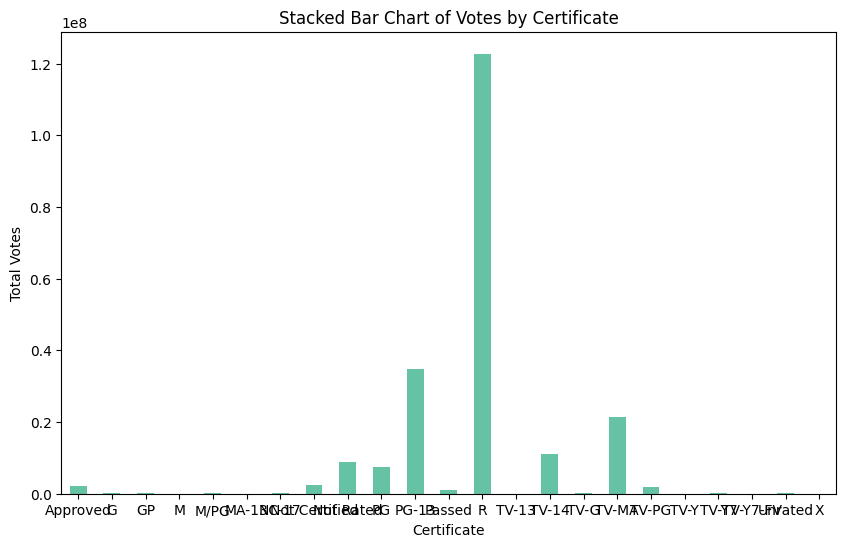

In [28]:
certificate_votes = data.groupby('certificate')['votes'].sum()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
certificate_votes.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)

plt.title('Stacked Bar Chart of Votes by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Converting votes to integer value

votes = data['votes'].to_list()
votes_list = []
for i in range(len(votes)):
    cleaned_string = votes[i].replace(",", "")
    votes_list.append(int(float(cleaned_string)))
data['votes'] = votes_list

AttributeError: 'int' object has no attribute 'replace'

In [26]:
gross_income = data['gross_income'].to_list()
gross_income_list = []
for i in range(len(gross_income)):
    if str(gross_income[i]).isdigit():
        gross_income[i] = int(gross_income[i])
    else:
        cleaned_string = float(str(gross_income[i]).replace(",", ""))
        gross_income_list.append(int(float(cleaned_string)))
        
# len(gross_income_list)
data['gross_income'] = gross_income_list

ValueError: Length of values (4503) does not match length of index (5000)

In [27]:
#  cleaning genre list
genre_list = [genre.strip() for genre in data.genre.str.split(',').str[0].tolist()]
data['genre'] = genre_list

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5368
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   object 
 1   name            5000 non-null   object 
 2   year            5000 non-null   int64  
 3   rating          5000 non-null   float64
 4   certificate     5000 non-null   object 
 5   duration        5000 non-null   int64  
 6   genre           5000 non-null   object 
 7   votes           5000 non-null   int64  
 8   gross_income    5000 non-null   object 
 9   directors_id    5000 non-null   object 
 10  directors_name  5000 non-null   object 
 11  stars_id        5000 non-null   object 
 12  stars_name      5000 non-null   object 
 13  description     5000 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 585.9+ KB


Summary Statistics of Dataset

In [17]:
data_description = data.describe(include='all')

# The final csv file contains data in the form of objects 
print('The data type of each feature is described below:\n', data_description)

The data type of each feature is described below:
                id       name        year       rating certificate  \
count        5000       5000  5000.00000  5000.000000        5000   
unique       5000       4743         NaN          NaN          23   
top     tt4710316  The Chase         NaN          NaN           R   
freq            1          4         NaN          NaN        1748   
mean          NaN        NaN  2002.53120     6.676800         NaN   
std           NaN        NaN    34.02514     1.113546         NaN   
min           NaN        NaN     0.00000     1.200000         NaN   
25%           NaN        NaN  1993.00000     6.000000         NaN   
50%           NaN        NaN  2009.00000     6.800000         NaN   
75%           NaN        NaN  2017.00000     7.400000         NaN   
max           NaN        NaN  2100.00000    11.000000         NaN   

           duration  genre         votes  gross_income directors_id  \
count   5000.000000   5000  5.000000e+03  5.00000

## Distribution of Dataset

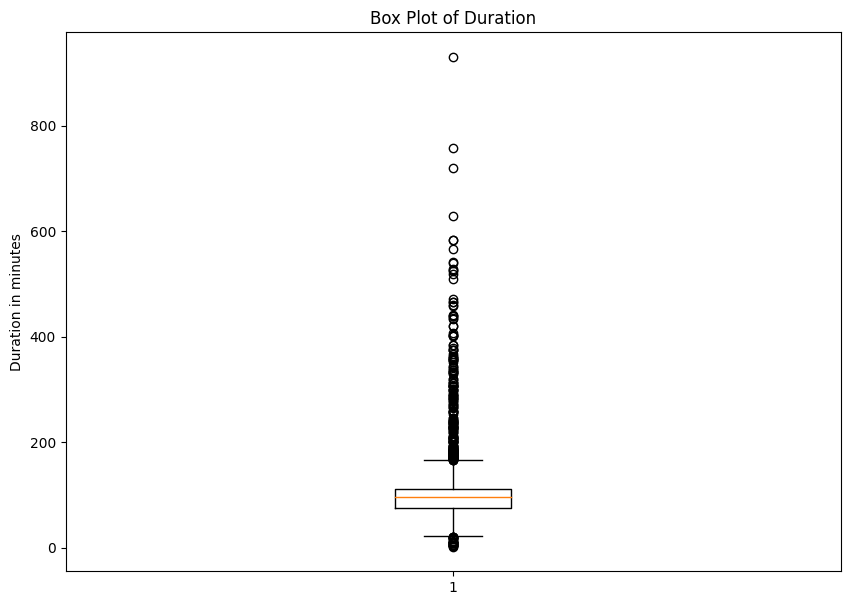

In [18]:
#Box and whisker plot for duration of movies
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['duration'])
plt.ylabel('Duration in minutes')
plt.title('Box Plot of Duration')
plt.show()

Duration Whisker plot: The median value is around 100 minutes which is around the general duration(1hour 40 min) of movie. But there are lot of outliers thus the median is not very representative of the actual data.

Text(0.5, 1.0, 'Box Plot of Ratings')

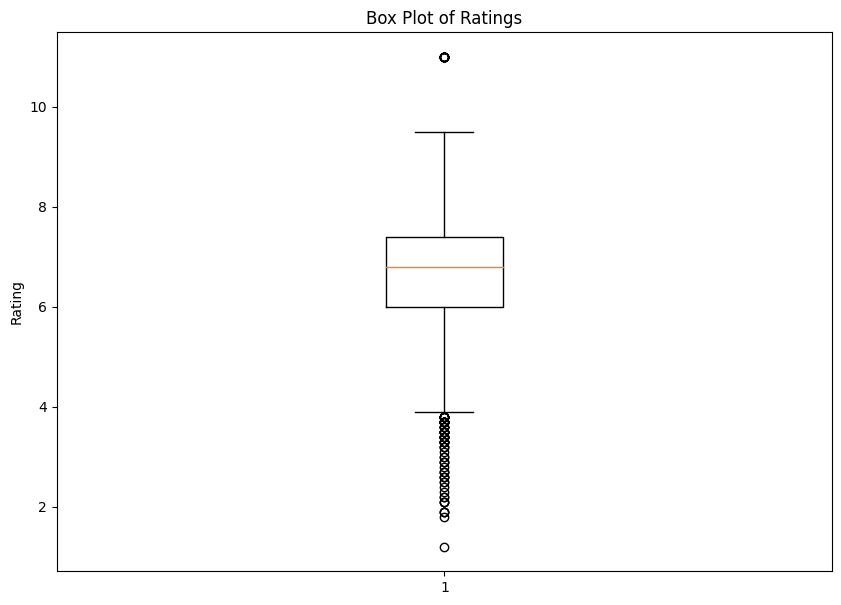

In [19]:
# Can add one more whisker plot
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['rating'])
plt.ylabel('Rating')
plt.title('Box Plot of Ratings')

Rating whisker plot: The graph shows that the median rating for movies is around 7, which is higher than the normal average of 5.5 on a scale of 1 to 10. Thus a movie rated as 8 out of 10 may not be as good as the rating sounds.

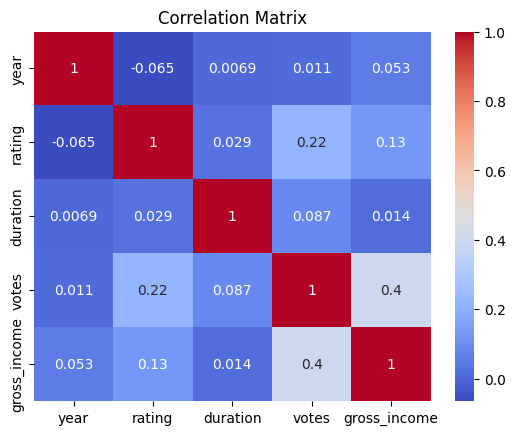

In [20]:
#Add a correlation matrix of all your numerical variables and give written
numerical_data = data[['year', 'rating', 'duration', 'votes', 'gross_income']]
corr_matrix = numerical_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#anlaysis of any variables that show strong correlation

The rating and votes have medium positive correlation, that means the movies with good rating are generally been voted by viewers. Also, more people are likely to rate higher gross income movies since they are more likely to have watched the movie.

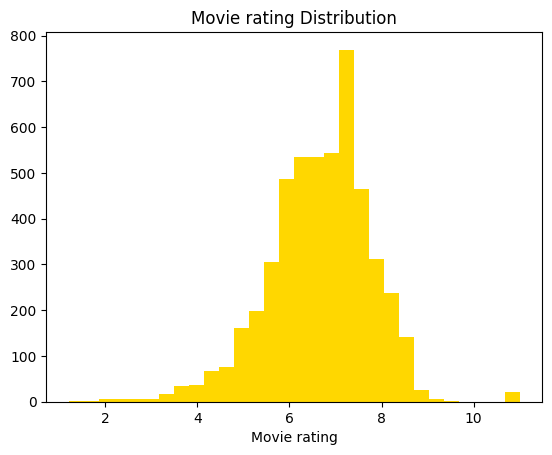

In [110]:
#BONUS: You can create a histogram to show distribution of a numerical variable
# data['rating'].hist(bins=30, color_discrete_sequence=['gold'])
plt.hist(data['rating'], bins=30, color =['gold'] )
plt.xlabel('Movie rating')
plt.title('Movie rating Distribution')
plt.show()

Movie Rating histogram: The plot follows a Normal/Gaussian distribution centered around 6.8 rating. But there is abnormally high value at 7.2 rating, probably meaning that people are way more likely to leave a 7 rating to even average movies. 

## Aggregation of Categorical Data

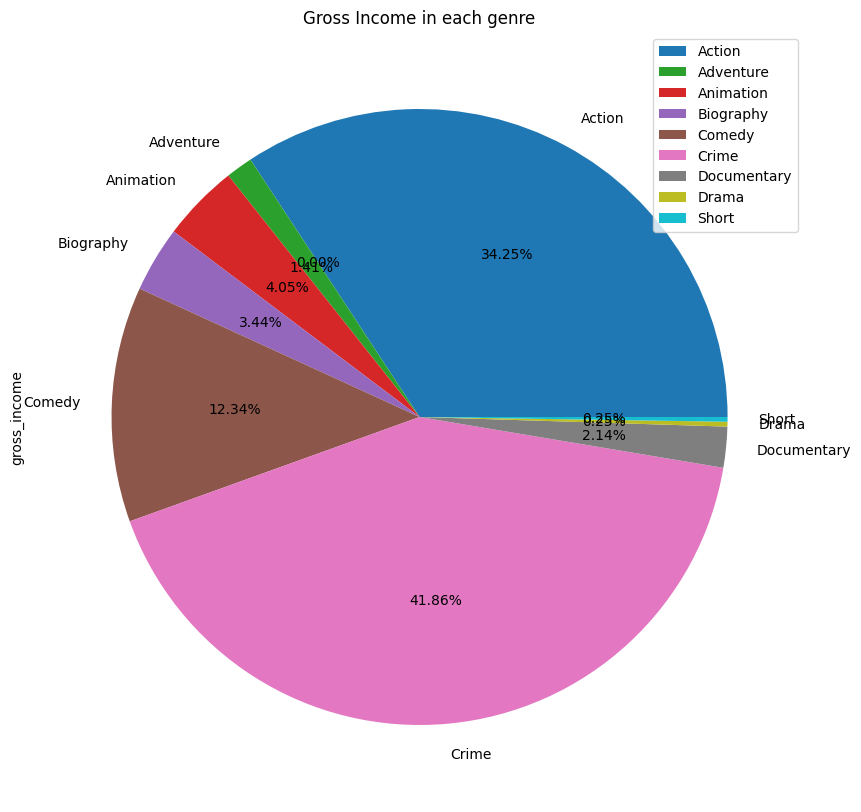

In [82]:
#Create either a bar chart or pie chart of the sum of one numerical value in
#relation to one categorical variable (i.e. sum of sales for each category of product)

plt.figure(figsize=(10, 10))
data.groupby(['genre'])['gross_income'].sum().plot(kind='pie', autopct='%1.2f%%')
plt.title('Gross Income in each genre')
plt.legend()
plt.show()

We can see that the 'Action' & 'Crime' genres make up for over 2/3rd of the entire Box Office earnings from the pie chart, which means that these two genres are most popular in terms of bringing audience to the theatres. 

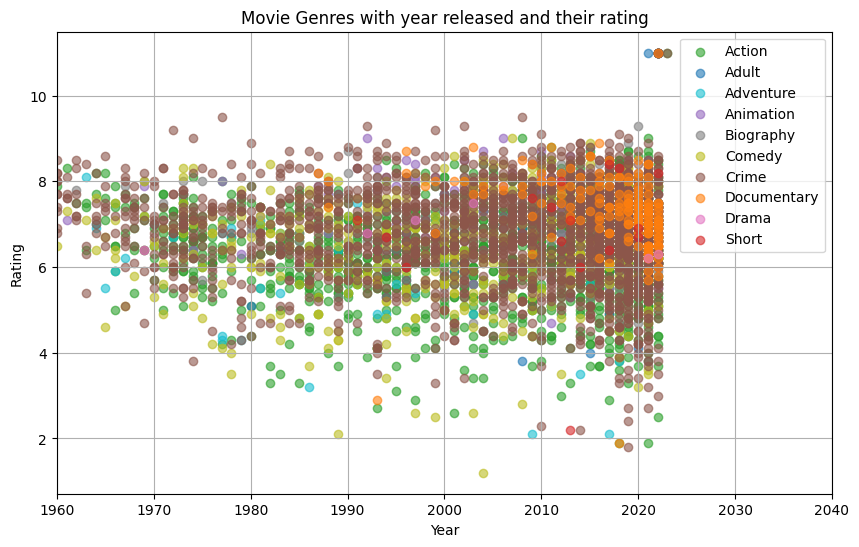

In [96]:
# Scatterplot with more than 2 visual encodings

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#7f7f7f', '#bcbd22', '#17becf', '#e377c2']

plt.figure(figsize=(10, 6))

genre_colors = {genre: color for genre, color in zip(data['genre'].unique(), colors)}

for genre, group in data.groupby('genre'):
    plt.scatter(group['year'], group['rating'], c=genre_colors.get(genre, 'gray'), label=genre, alpha=0.6)


plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Movie Genres with year released and their rating')

plt.xlim(1960, 2040)
plt.legend()

plt.grid(True)
plt.show()

The scatter plot shows that there is a noticeable cluster of data points for 'Documentary' genre from year 2010 onwards, which suggests an increase in the production of documentaries during this period. This could be attributed to a growing interest in documentaries as a form of storytelling and education.

# Other observations

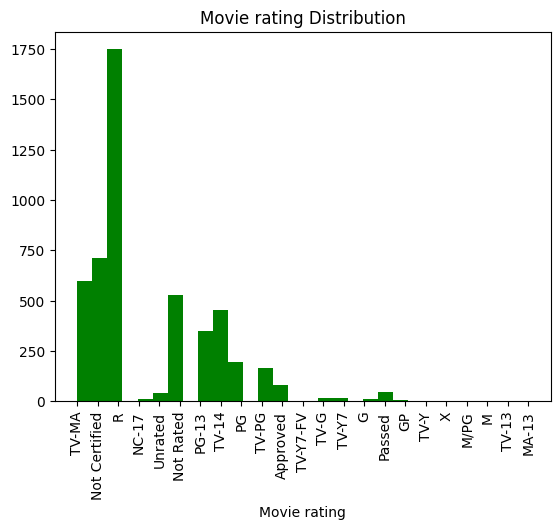

In [26]:
plt.hist(data['certificate'], bins=30, color =['green'] )
plt.xlabel('Movie rating')
plt.xticks(rotation=90)
plt.title('Movie rating Distribution')
plt.show()

The chart represents number of movies in each 'Certification' category and it shows that the maximum number of movies are rated as 'R'.
This observation re-inforces the findings of pie chart as most popular genre are 'Action & 'Crime' which both belongs to 'R' certification. 

## Insights & Trends

1. Duration Whisker plot: The median value is around 100 minutes which is around the general duration(1hour 40 min) of movie. But there are lot of outliers thus the median is not very representative of the actual data.

2. Rating whisker plot: The graph shows that the median rating for movies is around 7, which is higher than the normal average of 5.5 on a scale of 1 to 10. Thus a movie rated as 8 out of 10 may not be as good as the rating sounds.

3. Correlation Matrix: The rating and votes have medium positive correlation, that means the movies with good rating are generally been voted by viewers. Also, more people are likely to rate higher gross income movies since they are more likely to have watched the movie.

4. Movie Rating histogram: The plot follows a Normal/Gaussian distribution centered around 6.8 rating. But there is abnormally high value at 7.2 rating, probably meaning that people are way more likely to leave a 7 rating to even average movies. 

5. We can see that the 'Action' & 'Crime' genres make up for over 2/3rd of the entire Box Office earnings from the pie chart, which means that these two genres are most popular in terms of bringing audience to the theatres. 

6. The scatter plot shows that there is a noticeable cluster of data points for 'Documentary' genre from year 2010 onwards, which suggests an increase in the production of documentaries during this period. This could be attributed to a growing interest in documentaries as a form of storytelling and education.